### Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
%time data = pd.read_csv("./Hackathon_Ideal_Data.csv", delimiter=',', index_col=0)

Wall time: 330 ms


In [3]:
data.sample(5)

,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
MONTH,,,,,,,,,
M3,P7,6,205,SPICES (03/04),BLENDED,KITCHEN KING-BASIC MASALA,S NARENDRA KUMAR,EVEREST,EVEREST KITCHEN KN
M1,P2,1,150,CONFECTIONERY - TOFFEE/HBC,HARD B CANDIES,HARD B CANDIES,PERFETTI VAN MELLE,ALPENLIEBE,ALPENLIEBE CHATPATA
M1,P2,0,0,MOSQUITO REPELLANTS CTG (8/93),CARDS,CARDS,GODREJ CONSUMER PRODS,GOOD KNIGHT,GOOD KNIGHT ADVANCED FAST CARD
M1,P8,4,88,SPICES (03/04),BLENDED,MIXED MASALA-BASIC MASALA,PRAVIN MASALEWALE,AMBARI,AMBARI
M1,P5,33,1062,TOILET SOAPS (04/00),PREMIUM,PREMIUM,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE CREAM BEAUTY BATHING BAR


In [4]:
data.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [5]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x*100)

missing_data.loc[missing_data['Missing Percent'] > 10][:10]

,Total,Missing Percent


In [6]:
total

BRD          0
MBRD         0
CMP          0
SSGRP        0
SGRP         0
GRP          0
VALUE        0
QTY          0
STORECODE    0
dtype: int64

In [7]:
missing_data

,Total,Missing Percent
BRD,0,0.0
MBRD,0,0.0
CMP,0,0.0
SSGRP,0,0.0
SGRP,0,0.0
GRP,0,0.0
VALUE,0,0.0
QTY,0,0.0
STORECODE,0,0.0


Dari hasil di atas dapat kita ketahui bahwa tidak ada missing data pada dataset tersebut.

In [8]:
import pandas_profiling

In [10]:
import pandas_profiling

data_fifa = pd.read_csv('./Hackathon_Ideal_Data.csv')
profile = data_fifa.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="fifa_pandas_profiling.html")

### Seaborn

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [12]:
import seaborn as sns

In [13]:
data = pd.read_csv("./Hackathon_Ideal_Data.csv")

In [14]:
data.shape

(14260, 10)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
MONTH        14260 non-null object
STORECODE    14260 non-null object
QTY          14260 non-null int64
VALUE        14260 non-null int64
GRP          14260 non-null object
SGRP         14260 non-null object
SSGRP        14260 non-null object
CMP          14260 non-null object
MBRD         14260 non-null object
BRD          14260 non-null object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


### Menganalisis Variabel Secara Individual

In [16]:
numerical_vars = ['QTY', 'VALUE']
categorical_vars = ['MONTH', 'STORECODE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD']

In [17]:
data = data[numerical_vars+categorical_vars]

In [18]:
data.shape

(14260, 10)

### Memahami Variabel Utama

In [26]:
data['QTY'].describe()

count    14260.000000
mean        16.354488
std         34.365583
min          0.000000
25%          1.000000
50%          4.000000
75%         16.000000
max        641.000000
Name: QTY, dtype: float64

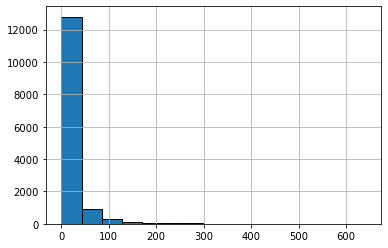

In [27]:
data['QTY'].hist(edgecolor = 'black', bins=15);

In [29]:
print("Skewness: {:0.3f}".format(data['QTY'].skew()))
print("Kurtosis: {:0.3f}".format(data['QTY'].kurt()))

Skewness: 5.538
Kurtosis: 51.735


### Variabel Numerikal

In [30]:
data[numerical_vars].describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

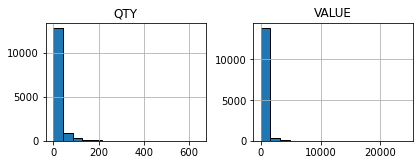

In [31]:
data[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

### Variabel Kategorikal

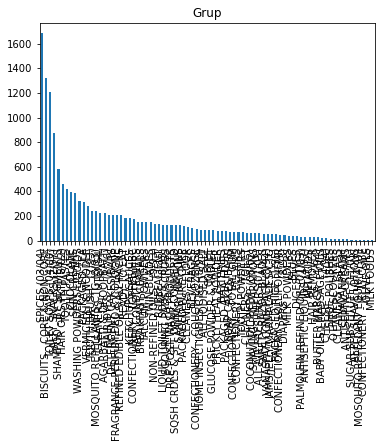

In [34]:
data['GRP'].value_counts().plot(kind='bar', title='Grup');

C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

C:\Users\ITD-STU\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  """


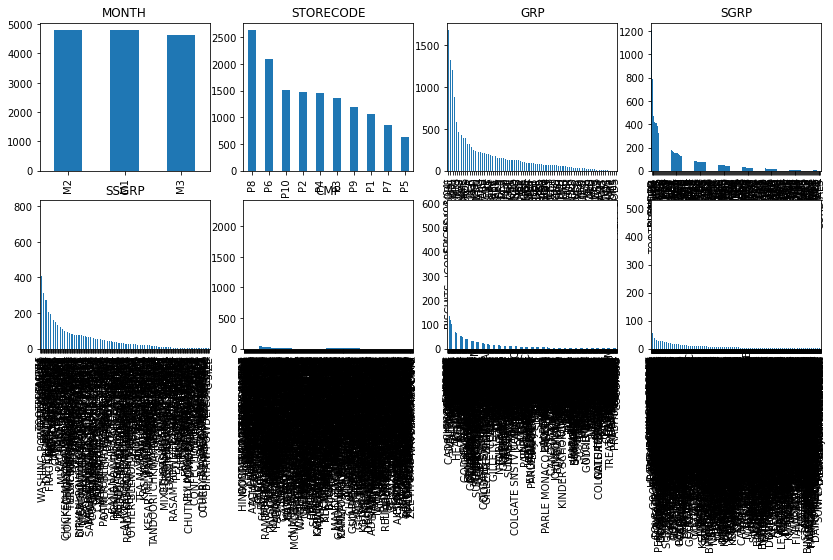

In [35]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    data[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

In [36]:
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [37]:
levels_to_keep = data[categorical_vars].apply(identify_cat_above30, axis=0)
levels_to_keep

MONTH                                             [M2, M1, M3]
STORECODE            [P8, P6, P10, P2, P4, P3, P9, P1, P7, P5]
GRP          [SPICES (03/04), BISCUITS - CORE & NON CORE, T...
SGRP         [BLENDED, PREMIUM, PURE, TOOTH PASTES, CREAM, ...
SSGRP        [PREMIUM, TOOTH PASTES, CREAM, SWEET/COOKIES, ...
CMP          [HINDUSTAN UNILEVER LIMITED, GODREJ CONSUMER P...
MBRD         [EVEREST, DOVE, LIFEBUOY, HALDIRAM, LUX, BALAJ...
BRD          [EVEREST, CHING'S SECRET, BADSHAH, SUHANA, RAM...
dtype: object

In [38]:
for var in categorical_vars:
    data = data.loc[data[var].isin(levels_to_keep[var])]

In [39]:
data.shape

(2917, 10)

C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ITD-STU\Anaconda3\lib\site-packages\pandas\

C:\Users\ITD-STU\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  """


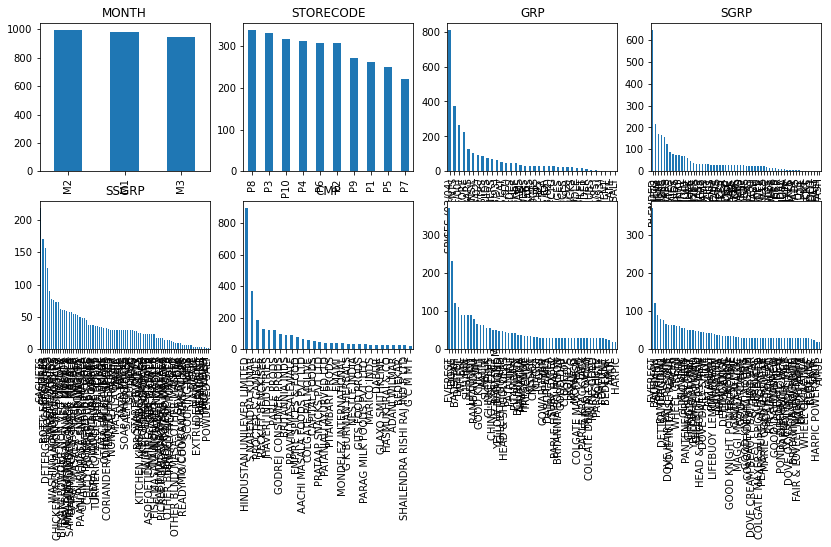

In [40]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    data[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

### Hubungan Antara Variabel dengan Scatter Plot

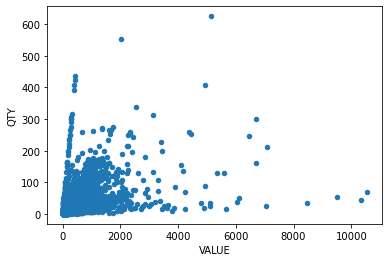

In [44]:
data.plot.scatter(x='VALUE', y='QTY');

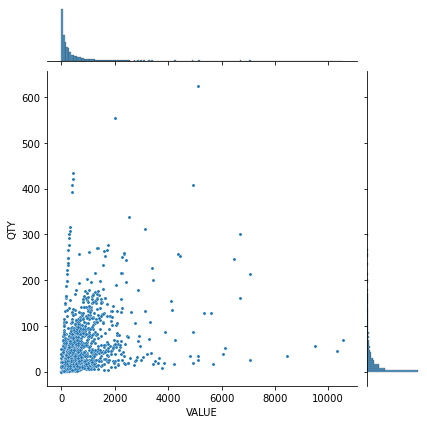

In [45]:
sns.jointplot(x='VALUE', y='QTY', data=data, joint_kws={"s": 10});

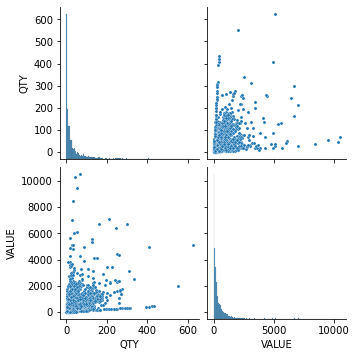

In [46]:
sns.pairplot(data[numerical_vars[:4]], plot_kws={"s": 10});

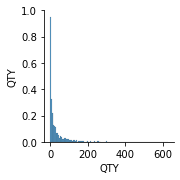

In [48]:
sns.pairplot(data[['QTY']+numerical_vars[4:]], plot_kws={"s": 10});

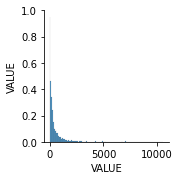

In [49]:
sns.pairplot(data[['VALUE']+numerical_vars[4:]], plot_kws={"s": 10});

In [50]:
data[numerical_vars].corr()

,QTY,VALUE
QTY,1.000000,0.443077
VALUE,0.443077,1.000000


In [51]:
data[numerical_vars].corr()['QTY'].sort_values(ascending=False)

QTY      1.000000
VALUE    0.443077
Name: QTY, dtype: float64

In [52]:
data[numerical_vars].corr()['VALUE'].sort_values(ascending=False)

VALUE    1.000000
QTY      0.443077
Name: VALUE, dtype: float64

In [53]:
correlations = data[numerical_vars].corr()

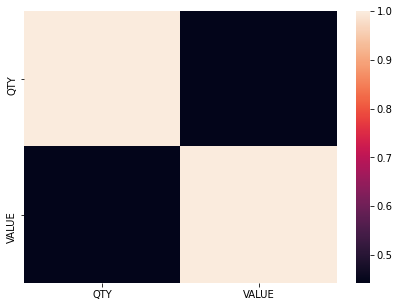

In [54]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);

### Hubungan Antara Variabel dengan Box Plot

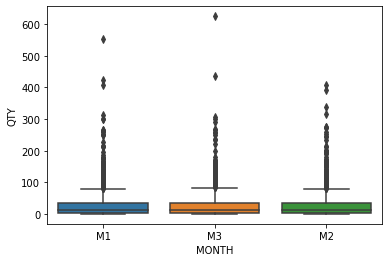

In [58]:
sns.boxplot(x='MONTH', y='QTY', data=data);

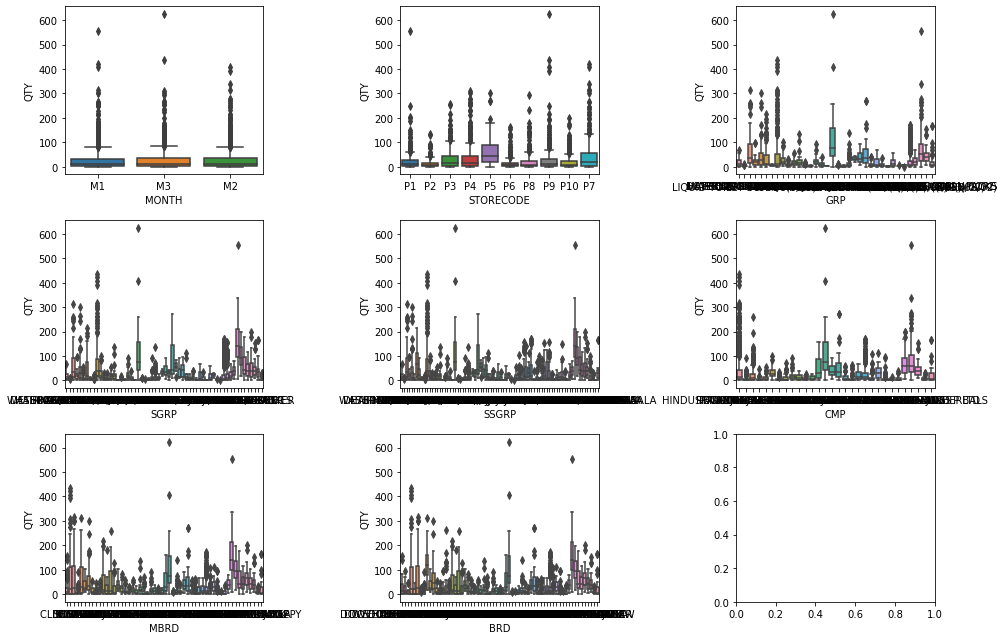

In [59]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='QTY', data=data, ax=subplot)
    
fig.tight_layout()

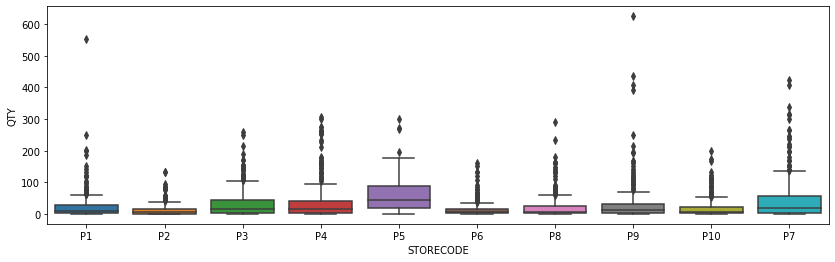

In [61]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='STORECODE', y='QTY', data=data, ax=ax);

In [62]:
sorted_nb = data.groupby('STORECODE')['QTY'].median().sort_values().index.values

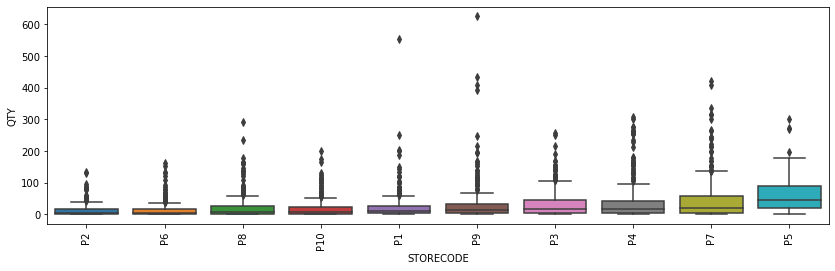

In [63]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='STORECODE', y='QTY', data=data, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

### Hubungan Antara Variabel dengan Complex Conditional Plots

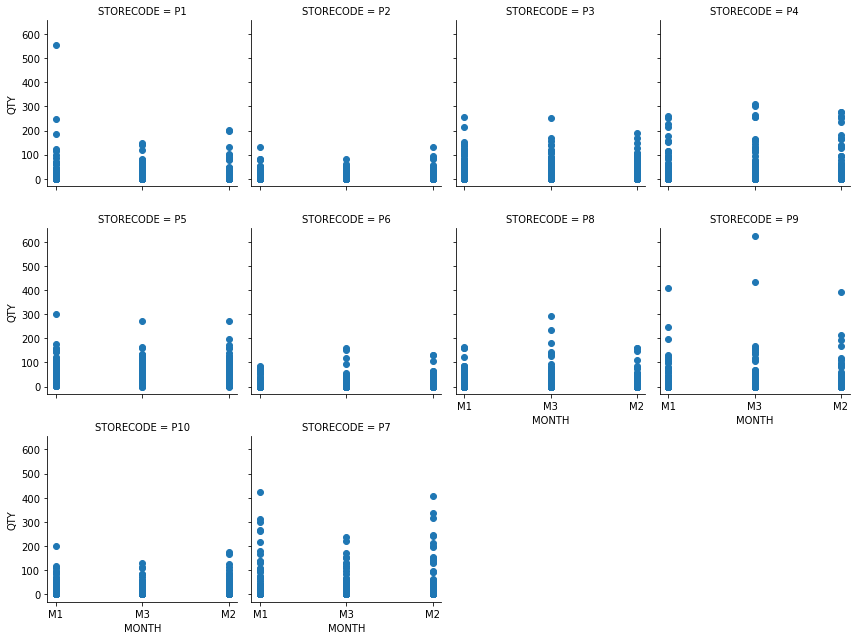

In [64]:
conditional_plot = sns.FacetGrid(data, col="STORECODE", col_wrap=4)
conditional_plot.map(plt.scatter, "MONTH", "QTY");